# Polinomio de interpolación de newton

In [ ]:
import matplotlib.pyplot as plt
from pylab import mpl
import numpy as np
import pandas as pd
import math
%matplotlib inline

## Funciones en python

In [2]:

def get_diff_table(X,Y):
    """
    Obtenga la tabla de interpolación
    """
    n=len(X)
    A=np.zeros([n,n])
    
    for i in range(0,n):
        A[i][0] = Y[i]
    
    for j in range(1,n):
        for i in range(j,n):
            A[i][j] = (A[i][j-1] - A[i-1][j-1])/(X[i]-X[i-j])
    
    return A
    
def newton_interpolation(X,Y,x):
    
    """
        Calcular la interpolación en x puntos
    """
    sum=Y[0]
    temp=np.zeros((len(X),len(X)))
        # Asignar la primera línea
    for i in range(0,len(X)):
        temp[i,0]=Y[i]
    temp_sum=1.0
    for i in range(1,len(X)):
        #x polinomio
        temp_sum=temp_sum*(x-X[i-1])
        # Calcular diferencia de medias
        for j in range(i,len(X)):
            temp[j,i]=(temp[j,i-1]-temp[j-1,i-1])/(X[j]-X[j-i])
        sum+=temp_sum*temp[i,i] 
    return sum

def ejecutar_newton_interpolation(X,Y):
    
    print("Tabla Algoritmo de interpolación de Newton implementado")
    A = get_diff_table(X,Y)
    df = pd.DataFrame(A)
    print(df)
    
    xs=np.linspace(np.min(X),np.max(X),1000,endpoint=True)
    ys=[]
    for x in xs:
        ys.append(newton_interpolation(X,Y,x))
    
    print("Grafica Algoritmo de interpolación de Newton implementado")
    plt.figure(figsize=(15,10))    
    plt.title("newton_interpolation")
    plt.plot (X, Y, 's', label = "valores originales") #El punto azul representa el valor original
    plt.plot (xs, ys, 'r', label = 'valores de interpolación') # Curva de interpolación
    plt.xlabel('x')  
    plt.ylabel('y')  
    plt.legend (loc = 4) # Especifique la posición de la leyenda
    
        

## Polinomios de Hermite usando diferencias divididas

Existe un método alterno para generar aproximaciones de Hermite que tiene sus bases en la fórmula de __diferencias divididas de interpolación de Newton__ en $x_0, x_1, ..., x_n$; esto es,


$$
P_n(X) = f[x_0] +  \sum_{k=1}^n  f[x_0, x_1, . . . , x_k ](x − x_0) · · · (x − x_{k−1}).
$$

El método alterno utiliza la conexión entre la enésima diferencia dividida y la enésima derivada de f.

Suponga que los diferentes números $x_0, x_1, x_2, x_n$ están dados junto con los valores de $f$ y $f'$ en estos números. De fina una nueva $z_0, z_1, …, z_{2n+1}$ mediante

$$
z_{2i} = z_{2i+1}= x_i , para  cada i = 0, 1, . . . , n,
$$

y construya la tabla de diferencias divididas en la forma de la tabla 3.9 que usa $z_0, z_1, …, z_{2n+1}$.

Puesto que $z_{2i} = z_{2i+1} = x_i$ para cada $i$ $ f[z_2i , z_{2i+1}]$ con la fórmula de diferencias divididas. Sin embargo, que la sustitución razonable en estas situaciones es $f[z_{2i} , z_{2i+1}] = f(z_{2i} ) = f(x_i)$, podemos usar las entradas

$$
f'(x_0), f'(x_1), . . . , f'(x_n)
$$

en lugar de las primeras diferencias divididas no definidas.

$$
f[z_0, z_1], f[z_2, z_3], . . . , f[z_{2n}, z_{2n+1}].
$$

Las diferencias divididas restantes se producen de la manera común y las diferencias divididas adecuadas se usan en la fórmula de diferencias divididas de interpolación de Newton. La tabla muestra las entradas que se utilizan para las primeras tres columnas de diferencias divididas al determinar el polinomio de Hermite $H_5(x)$ para $x_0, x_1 y x_2$. Las entradas restantes se generan de la manera que se muestra en la tabla. El polinomio de Hermite está dado por 

\begin{equation}
H_{2n+1}(x) = f[z_0] + \sum_{k=1}^{2n+1} f [z_0, . . . , z_k ](x − z_0)(x − z_1) · · · (x − z_{k−1}).
\end{equation}


**Tabla procedimiento __Polinomio de interpolación de Newton__ **

<img src="imagenes/tablaInterNew.png" title="Title text"/>

*Imagen del libro de Burden - Análisis numérico 10ed (2017)*


** Gráficamente puede interpretar __Polinomio de interpolación de Newton__ **

<img src="imagenes/intnew.png" title="Title text"/>

*Imagen del libro de Burden - Análisis numérico 10ed (2017)*


*******************




## Ejemplos

Encontrar el polinomio de interpolación de Newton que ajusta los datos $(−1, 2), (0, −1), (1, 1) y (2, −2)$.

__Solución:__ al organizar los puntos en una tabla se obtiene:

Ahora, se deben calcular las diferencias divididas de orden $0, 1, 2$ y  $3$. Las diferencias de orden cero $f[x_i]$, corresponden a la columna $y_i$, de donde:



| $i$ | $x_i$ | $\Delta^0$ |
|---|-----|---|
|  0|    -1|  2|
|   1|     0|   -1|
|   2|     1|   1|
|   3|     2|   -2|



Para determinar las diferencias de orden uno, $Δ_1$, se debe calcular $f[x_{i−1}, x_i] = \frac{f[x_i ]− f[x_{i−1}]} {x_i− x_{i−1}}$
para $i = 1, 2, 3$:

| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ |
|---|-----|---|---|
|  0|    -1|  2|
|   1|     0|   -1|$f[x_0,x_1]$|
|   2|     1|   1|$f[x_1,x_2]$|
|   3|     2|   -2|$f[x_2,x_3]$|


Calculando cada $f[x_{i−1}, x_i]$ y recordando que $f[x_j]$ corresponde a $y_j$ , se obtiene:

| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ |
|---|-----|---|---|
|  0|    -1|  2|
|   1|     0|   -1|$f[x_0,x_1] = \frac{y_1-y_0}{x_1-x_0}$|
|   2|     1|   1|$f[x_1,x_2] = \frac{y_2-y_1}{x_2-x_1} $|
|   3|     2|   -2|$f[x_2,x_3] = \frac{y_3-y_2}{x_3-x_2}$|

Tomando los valores correspondientes, se concluye:

| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ |
|---|-----|---|---|
|  0|    -1|  2|
|  1|     0| -1|$\frac{-1-2}{0-(-1)} = -3$|
|  2|     1|  1|$\frac{1-(-1)}{1-0} = -2$|
|  3|     2| -2|$\frac{-2-1}{2-1} = -3$|

Ahora, se agrega una columna con las diferencias de orden dos, $Δ_2$, que contiene los valores $f[x_{i−2}, x_{i−1}, x_i]$ para $i = 2, 3$.


| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ | $\Delta^2$ |
|---|-----|---|---|---|
|  0|    -1|  2|
|  1|     0| -1| -3|
|  2|     1|  1|  2|$f[x_0, x_1, x_2]$|
|  3|     2| -2| -3|$f[x_1, x_2, x_3]$|

Como $f[x_{i−2}, x_{i−1}, x_i] = \frac {f[x_{i−1} ,x_i ]− f[x_{i−2},x_{i−1}]} {x_i−x_{i−2}}$:


| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ | $\Delta^2$ |
|---|-----|---|---|---|
|  0|    -1|  2|
|  1|     0| -1| -3|
|  2|     1|  1|  2|$f[x_0, x_1, x_2] = \frac{f[x_1, x_2]-f[x_0, x_1]}{x_2-x_0}$|
|  3|     2| -2| -3|$f[x_1, x_2, x_3] = \frac{f[x_2, x_3]-f[x_1, x_2]}{x_3-x_1}$|

Dado que $f[x_{i−1}, x_i]$ está ubicado en la columna $Δ^1$, entonces:

| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ | $\Delta^2$ |
|---|-----|---|---|---|
|  0|    -1|  2|
|  1|     0| -1| -3|
|  2|     1|  1|  2|$\frac{f[x_1, x_2]-f[x_0, x_1]}{x_2-x_0} =  \frac{2-(-3)}{1-(-1)} = \frac{5}{2}$|
|  3|     2| -2| -3|$\frac{f[x_2, x_3]-f[x_1, x_2]}{x_3-x_1} =  \frac{-3-2}{2-0} = \frac{-5}{2}$|


Por último, se construye la columna $Δ^3$, que contiene a $f[x_0, x_1, x_2, x_3] = \frac {f[x_1,x_2,x_3]− f[x_0,x_1 ,x_2]} {x_3−x_0} $

| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ | $\Delta^2$ |
|---|-----|---|---|---|
|  0|    -1|  2|
|  1|     0| -1| -3|
|  2|     1|  1|  2|
|  3|     2| -2| -3|$\frac{-5}{2} f[x_0, x_1, x_2, x_3] = \frac{f[x_1, x_2, x_3]-f[x_0, x_1, x_2]}{x_3 - x_0}$|


Como $f[x_1, x_2, x_3]$ y $f[x_0, x_1, x_2]$ están en la columna $Δ^2$, se determina que


| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ | $\Delta^2$ |
|---|-----|---|---|---|
|  0|    -1|  2|
|  1|     0| -1| -3|
|  2|     1|  1|  2|$\frac{5}{2} $|
|  3|     2| -2| -3|$\frac{-5}{2} \frac{f[x_1, x_2, x_3]-f[x_0, x_1, x_2]}{x_3 - x_0} = \frac{-5}{3}$|




Una vez calculadas todas las diferencias divididas, se procede a escribir el polinomio de interpolación:

$P(x) = f[x_0]+f[x_0, x_1](x−x_0)+f[x_0, x_1, x_2](x−x_0)(x−x_1)+f [x_0, x_1, x_2, x_3](x−x_0)(x−x_1)(x−x_2)$.

Notar que los valores $f[x_0], f[x_0, x_1], f[x_0, x_1, x_2], f[x_0, x_1, x_2, x_3]$ corresponden a la diagonal de la tabla de diferencias divividas. Por lo tanto, al reemplazar los correspondientes valores de la diagonal, se concluye que $ P(x) = 2 − 3(x + 1) + \frac {5}{2} (x + 1)x − \frac {5}{3}(x + 1)x(x − 1)$.

Tabla Algoritmo de interpolación de Newton implementado
     0    1    2         3
0  2.0  0.0  0.0  0.000000
1 -1.0 -3.0  0.0  0.000000
2  1.0  2.0  2.5  0.000000
3 -2.0 -3.0 -2.5 -1.666667
Grafica Algoritmo de interpolación de Newton implementado


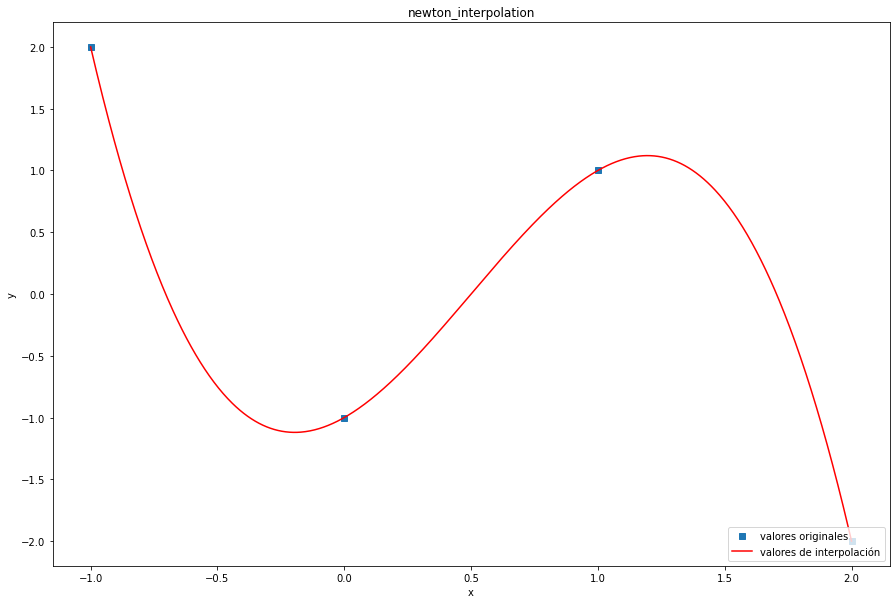

In [3]:
#(−1, 2), (0, −1), (1, 1) y (2, −2)

X=[-1,0,1,2]
Y=[2,-1,1,-2]
ejecutar_newton_interpolation(X,Y)